<a href="https://colab.research.google.com/github/hemanandinipendurthi/final-yr-project/blob/main/Topic_01_sep_25_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***Chronic Heart Disease Risk Classification using Mixed Sensor and Clinical Data***

### **Project Overview**
This project aims to classify patients at different risk levels for **chronic heart disease** using a combination of **sensor data** (ECG, SpO₂, BP) and **clinical categorical features** (chest pain, shortness of breath, etc.).  
The dataset is **tabular**, synthetic, and designed for **machine learning** and **big data scaling studies**.

### **Key Research Questions**
1. Can mixed sensor readings and clinical data accurately classify patients at risk for chronic heart disease?
2. Which sensor features are the strongest predictors of heart disease risk?
3. How does machine learning performance change when scaling the dataset?

### **Dataset Information**
- **Source:** Mendeley Data (Elsevier) — [https://data.mendeley.com/datasets/gsmjh55sfy/1](https://data.mendeley.com/datasets/gsmjh55sfy/1)
- **Type:** Tabular (Numerical + Categorical)
- **Target Variable:** `Triage` — Multiclass (URGENT, SICK, RISK, NORMAL, COLD STATE)
- **Size:** 50,000 records (Big Data)

In the following cells, we will perform:
1. Data Loading and Inspection  
2. Data Cleaning and Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Feature Encoding and Scaling  
5. Model Training (RandomForest, XGBoost, etc.)  
6. Model Evaluation and Visualization


## **Import Libraries:**
We import all the necessary Python libraries for data analysis, visualization, and machine learning.


In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


### **Load Dataset:**
We load the uploaded dataset `Big Data - 50000.csv` and display the first few rows to understand its structure.


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Big Data - 50000.csv")

# Display shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (50000, 15)


,P. ID,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,1,78,F,96,21.0,11.5,No,Yes,Yes,Yes,121,0.4,regular,No,URGENT
1,2,77,F,98,17.5,9.5,No,No,No,No,97,0.4,irregular,Yes,SICK
2,3,59,F,94,22.5,9.0,Yes,No,No,Yes,76,0.4,irregular,No,RISK
3,4,62,M,82,22.5,12.0,No,No,Yes,Yes,64,0.4,regular,No,NORMAL
4,5,78,M,86,11.5,10.5,Yes,Yes,Yes,Yes,106,0.2,irregular,No,SICK


## **Data Inspection:**
We inspect the dataset for missing values, data types, and general statistical summary.


In [ ]:
# Check data info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P. ID      50000 non-null  int64  
 1   Age        50000 non-null  int64  
 2   Sex        50000 non-null  object 
 3   Spo2       50000 non-null  int64  
 4   HBlood     50000 non-null  float64
 5   LBlood     50000 non-null  float64
 6   ChestPain  50000 non-null  object 
 7   SHBreath   50000 non-null  object 
 8   Palip      50000 non-null  object 
 9   Rest       50000 non-null  object 
 10  Peaks      50000 non-null  int64  
 11  QRSwidth   50000 non-null  float64
 12  P_P        50000 non-null  object 
 13  STEl       50000 non-null  object 
 14  Triage     50000 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 5.7+ MB

Missing Values:
 P. ID        0
Age          0
Sex          0
Spo2         0
HBlood       0
LBlood       0
ChestPain    0
SHBreath     0
Palip      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P. ID,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
Age,50000.0,NaN,NaN,NaN,65.00758,14.695572,40.0,52.0,65.0,78.0,90.0
Sex,50000,2,M,25142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spo2,50000.0,NaN,NaN,NaN,90.71212,6.348418,80.0,86.0,92.0,96.0,100.0
HBlood,50000.0,NaN,NaN,NaN,17.80125,3.462485,11.0,15.0,18.5,20.5,23.0
LBlood,50000.0,NaN,NaN,NaN,9.36819,1.826775,6.0,8.0,9.5,11.0,12.0
ChestPain,50000,2,Yes,25230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHBreath,50000,2,No,25694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palip,50000,2,Yes,25062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rest,50000,2,No,25666,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P. ID,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
Age,50000.0,NaN,NaN,NaN,65.00758,14.695572,40.0,52.0,65.0,78.0,90.0
Sex,50000,2,M,25142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spo2,50000.0,NaN,NaN,NaN,90.71212,6.348418,80.0,86.0,92.0,96.0,100.0
HBlood,50000.0,NaN,NaN,NaN,17.80125,3.462485,11.0,15.0,18.5,20.5,23.0
LBlood,50000.0,NaN,NaN,NaN,9.36819,1.826775,6.0,8.0,9.5,11.0,12.0
ChestPain,50000,2,Yes,25230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHBreath,50000,2,No,25694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palip,50000,2,Yes,25062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rest,50000,2,No,25666,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA):**
We explore the dataset visually to understand feature distributions and relationships with the target variable.

Steps:
1. Plot class distribution for the target variable `Triage`.
2. Plot distribution histograms for numerical features.
3. Plot boxplots to detect outliers.
4. Generate a correlation heatmap with values to understand inter-feature relationships.
5. Visualize pair relationships between key sensor features.
6. Visualize average sensor readings by heart disease risk category.


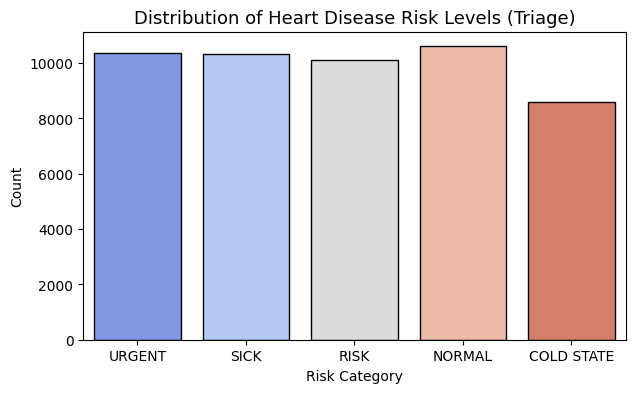

In [ ]:
# Distribution of Target Classes
plt.figure(figsize=(7,4))
sns.countplot(x='Triage', data=df, palette='coolwarm', edgecolor='black')
plt.title("Distribution of Heart Disease Risk Levels (Triage)", fontsize=13)
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

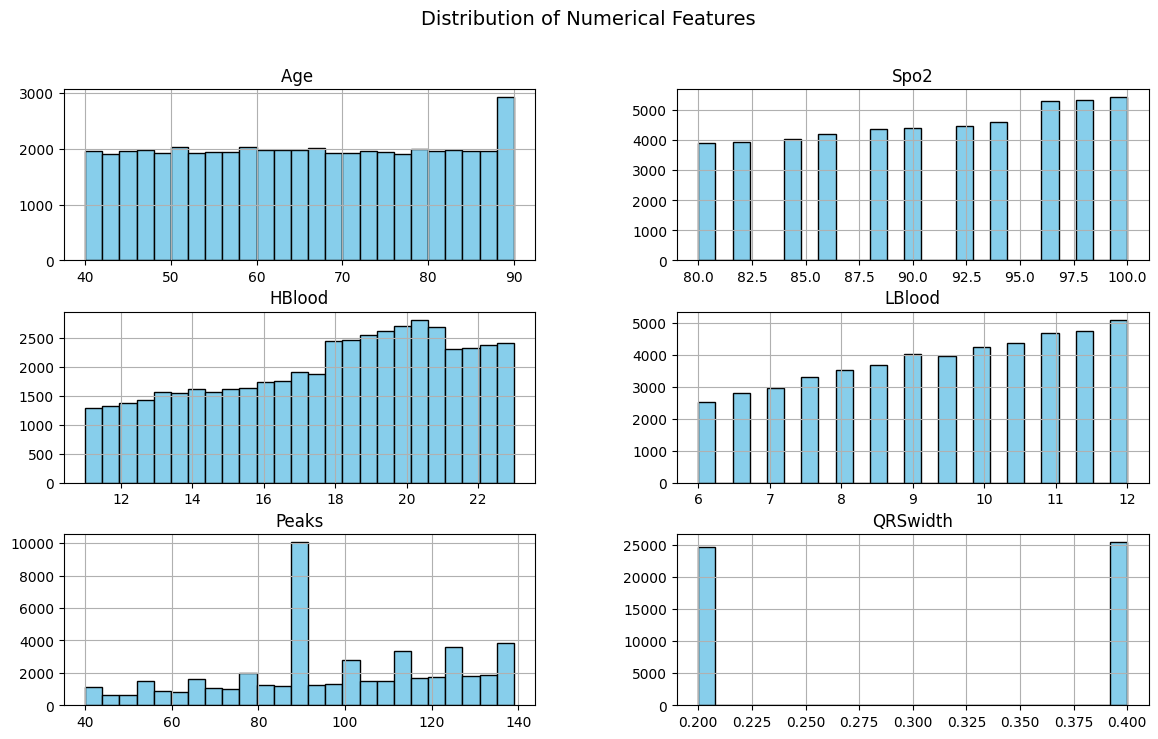

In [ ]:
# Histograms for Numerical Features
numeric_cols = ['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks', 'QRSwidth', 'P_P', 'STEl']
df[numeric_cols].hist(bins=25, figsize=(14,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

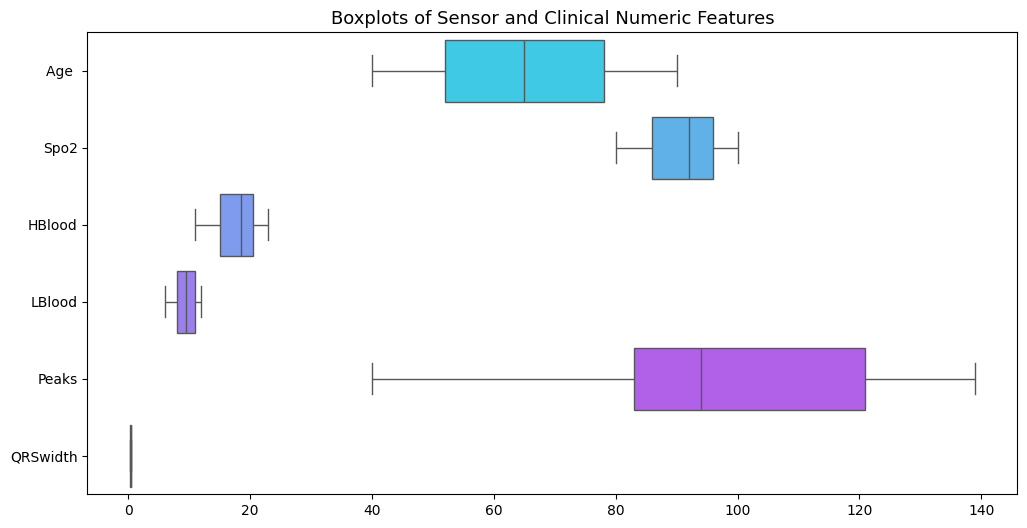

In [ ]:

# Boxplots to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='cool')
plt.title("Boxplots of Sensor and Clinical Numeric Features", fontsize=13)
plt.show()


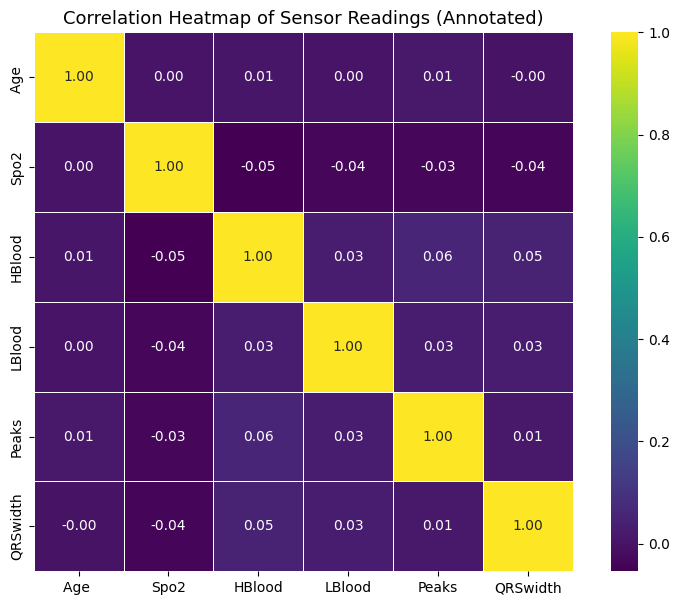

In [ ]:
#  Correlation Heatmap with Annotated Values
plt.figure(figsize=(10,7))
# Corrected numeric_cols list to exclude non-numeric columns for correlation calculation
numeric_cols_for_corr = ['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks', 'QRSwidth']
corr_matrix = df[numeric_cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Sensor Readings (Annotated)", fontsize=13)
plt.show()

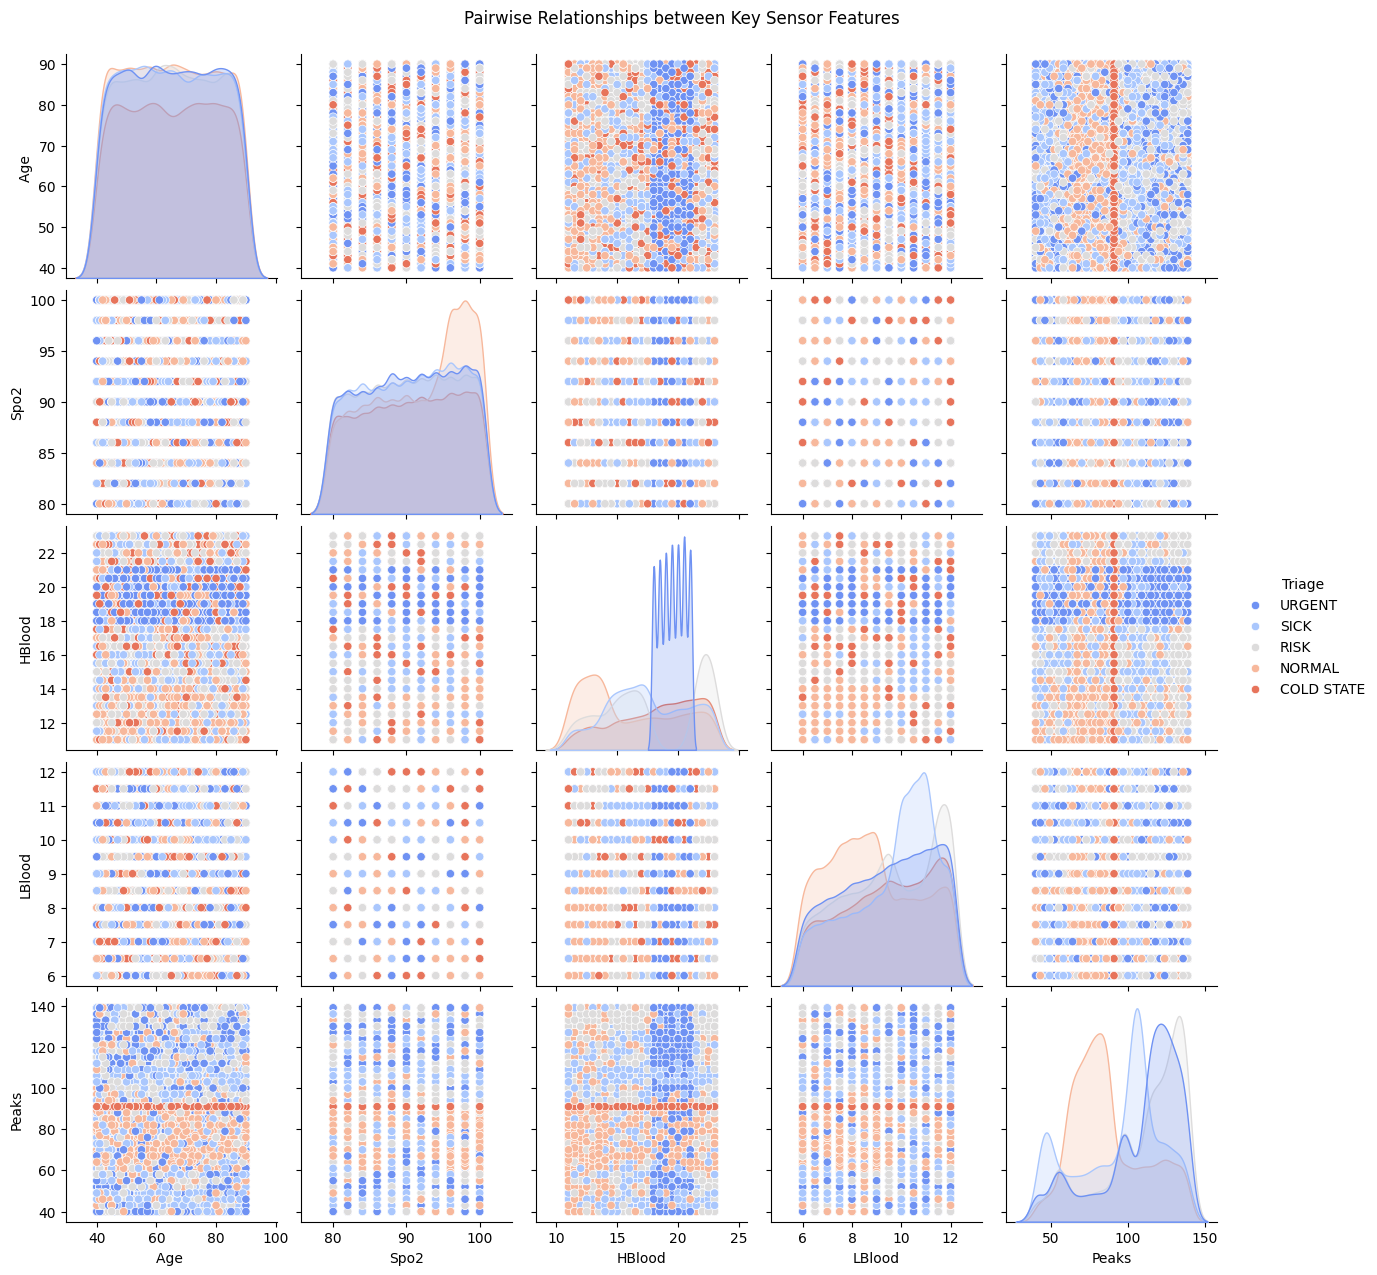

In [ ]:
#  Pair Plot for Key Variables
sns.pairplot(df, vars=['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks'], hue='Triage', palette='coolwarm')
plt.suptitle("Pairwise Relationships between Key Sensor Features", y=1.02)
plt.show()


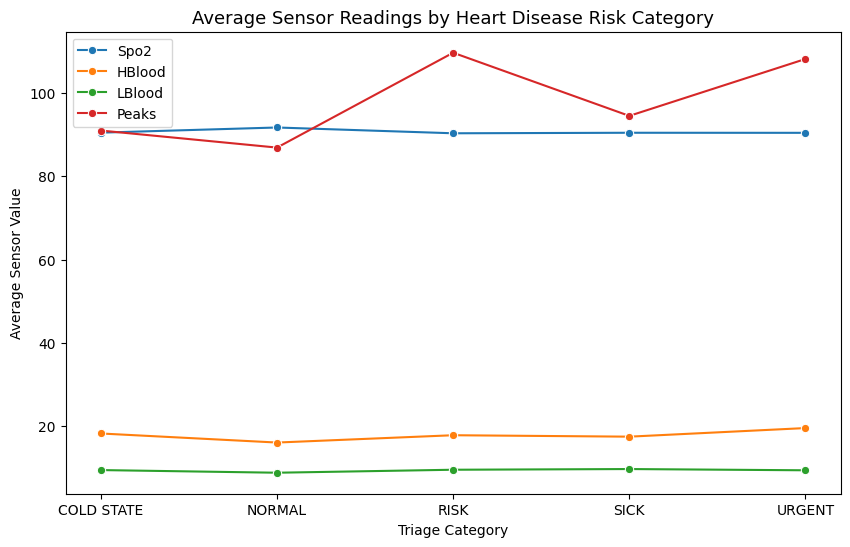

In [ ]:

# Average Sensor Values by Triage Category
avg_features = df.groupby('Triage')[['Spo2', 'HBlood', 'LBlood', 'Peaks']].mean().reset_index()

plt.figure(figsize=(10,6))
for col in ['Spo2', 'HBlood', 'LBlood', 'Peaks']:
    sns.lineplot(x='Triage', y=col, data=avg_features, marker='o', label=col)
plt.title("Average Sensor Readings by Heart Disease Risk Category", fontsize=13)
plt.xlabel("Triage Category")
plt.ylabel("Average Sensor Value")
plt.legend()
plt.show()


## **Encode All Categorical Columns:**
We convert **all categorical (string) columns** in the dataset into numeric form using Label Encoding.
This includes:
- Sex
- ChestPain
- SHBreath
- Palip
- Rest
- P_P
- STE1
- Triage (target variable)

Label encoding assigns numeric codes for each category:
e.g., M→1, F→0, Yes→1, No→0, regular→1, irregular→0, etc.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original structure
df_encoded = df.copy()

# Detect all object (categorical) columns automatically
cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(" All categorical columns have been label-encoded successfully!\n")
print("Encoded Columns:", cat_cols)

# Display a sample of the encoded dataset
df_encoded.head()


 All categorical columns have been label-encoded successfully!

Encoded Columns: ['Sex', 'ChestPain', 'SHBreath', 'Palip', 'Rest', 'P_P', 'STEl', 'Triage']


,P. ID,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,1,78,0,96,21.0,11.5,0,1,1,1,121,0.4,1,0,4
1,2,77,0,98,17.5,9.5,0,0,0,0,97,0.4,0,1,3
2,3,59,0,94,22.5,9.0,1,0,0,1,76,0.4,0,0,2
3,4,62,1,82,22.5,12.0,0,0,1,1,64,0.4,1,0,1
4,5,78,1,86,11.5,10.5,1,1,1,1,106,0.2,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# **Model Training**

**Setting Target Variable and Dataset splitting**

In [1]:
target_col = "Triage"
id_cols = ["P. ID"]
feature_cols = [c for c in df_encoded.columns if c not in id_cols + [target_col]]

X = df_encoded[feature_cols].values
y = df_encoded[target_col].astype(int).values
classes = np.unique(y)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale for LR / SVM (not for RF). No pipelines used — manual fit/transform.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


NameError: name 'df_encoded' is not defined

**Helper Function for Evaluation Metrics and Plotting**

In [ ]:
def print_basic_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {name} : Test Metrics ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1: {f1m:.4f}")
    print("\nClassification report:")
    print(classification_report(y_true, y_pred, digits=3))

def plot_confusion_matrix(name, y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig = plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    ticks = np.arange(len(labels))
    plt.xticks(ticks, labels)
    plt.yticks(ticks, labels)
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.tight_layout()
    plt.show()

def plot_multiclass_roc(name, y_true, scores, labels):
    """
    scores: shape (n_samples, n_classes) of probabilities or decision scores.
    """
    y_bin = label_binarize(y_true, classes=labels)
    # micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), scores.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)

    # per-class and macro
    fprs, tprs, aucs = {}, {}, {}
    for i, c in enumerate(labels):
        fprs[c], tprs[c], _ = roc_curve(y_bin[:, i], scores[:, i])
        aucs[c] = auc(fprs[c], tprs[c])

    # macro-average (simple mean of AUCs)
    auc_macro = np.mean(list(aucs.values()))

    # Plot per-class ROC
    for c in labels:
        plt.figure()
        plt.plot(fprs[c], tprs[c], label=f"Class {c} (AUC={aucs[c]:.3f})")
        plt.plot([0,1],[0,1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} — ROC (Class {c})")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    # Plot micro/macro summary
    plt.figure()
    plt.plot(fpr_micro, tpr_micro, label=f"Micro-average (AUC={auc_micro:.3f})")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} — ROC (Micro avg) | Macro AUC={auc_macro:.3f}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    print(f"{name} — ROC AUCs:")
    for c in labels:
        print(f"  Class {c}: {aucs[c]:.4f}")
    print(f"  Micro-average: {auc_micro:.4f}")
    print(f"  Macro-average: {auc_macro:.4f}")


**Logistic Regression**

LogReg Train time: 0.4856s | Test time: 0.0153s

=== Logistic Regression : Test Metrics ===
Accuracy: 0.4459
Macro F1: 0.3948

Classification report:
              precision    recall  f1-score   support

           0      0.146     0.038     0.060      2150
           1      0.530     0.708     0.606      2651
           2      0.447     0.267     0.334      2527
           3      0.449     0.622     0.521      2580
           4      0.402     0.516     0.452      2592

    accuracy                          0.446     12500
   macro avg      0.395     0.430     0.395     12500
weighted avg      0.404     0.446     0.408     12500



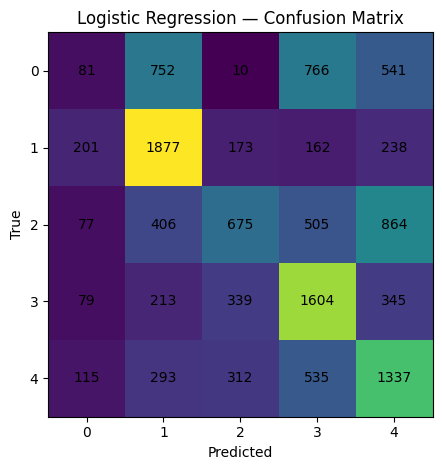

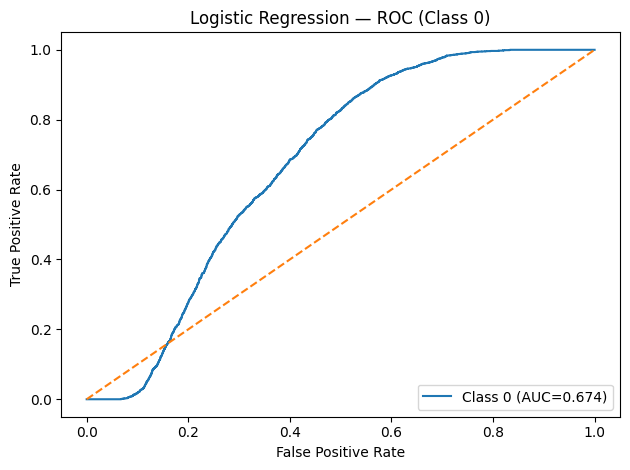

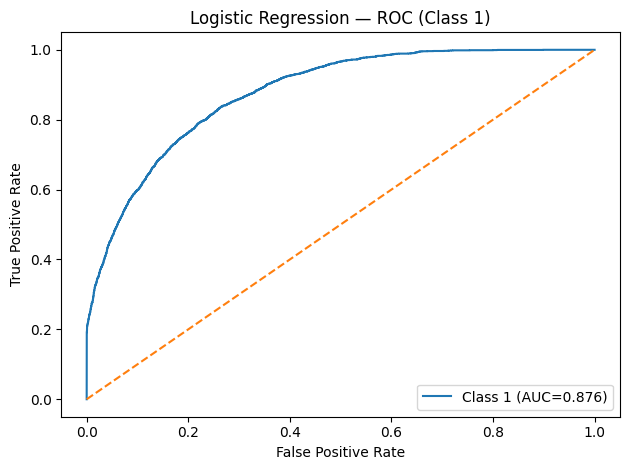

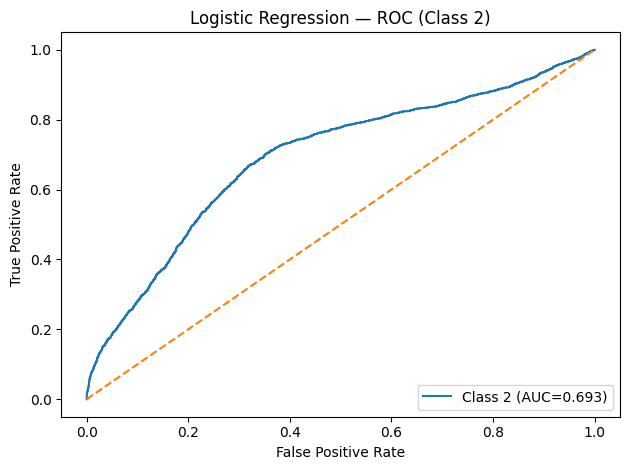

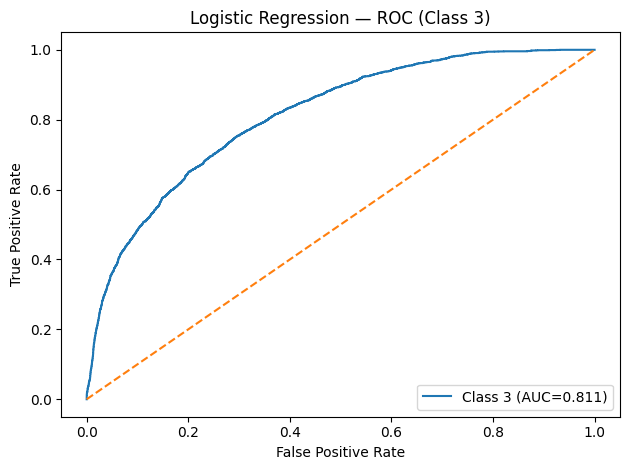

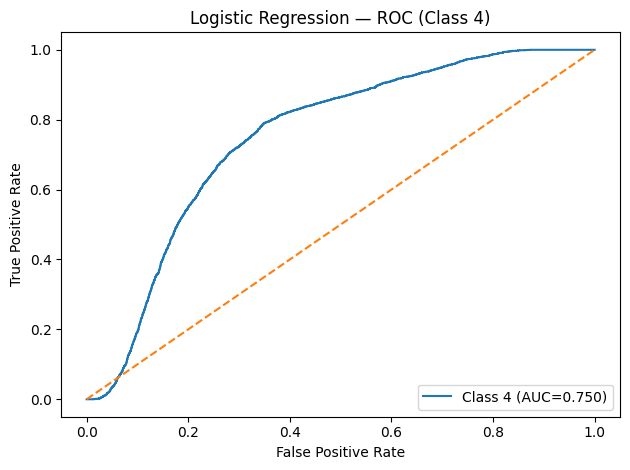

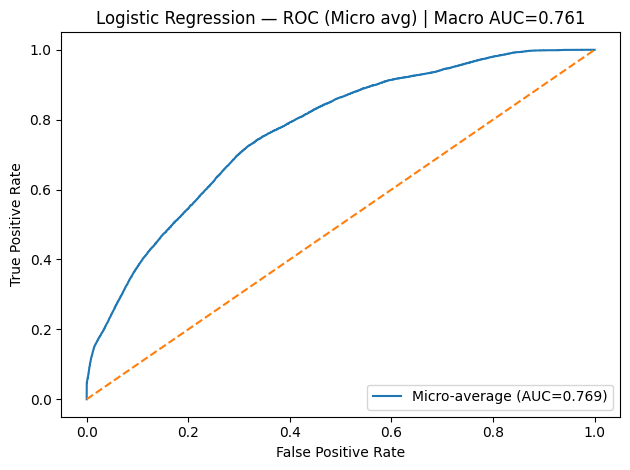

Logistic Regression — ROC AUCs:
  Class 0: 0.6735
  Class 1: 0.8761
  Class 2: 0.6932
  Class 3: 0.8115
  Class 4: 0.7504
  Micro-average: 0.7687
  Macro-average: 0.7610


In [ ]:
logreg = LogisticRegression(
    multi_class="ovr", solver="lbfgs", max_iter=1000, class_weight=None
)

t0 = time.perf_counter()
logreg.fit(X_train_scaled, y_train)
train_time_lr = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_lr = logreg.predict(X_test_scaled)
test_time_lr = time.perf_counter() - t1

print(f"LogReg Train time: {train_time_lr:.4f}s | Test time: {test_time_lr:.4f}s")
print_basic_metrics("Logistic Regression", y_test, y_pred_lr)
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr, classes)

# ROC (use predict_proba if available; LogisticRegression has it)
proba_lr = logreg.predict_proba(X_test_scaled)
plot_multiclass_roc("Logistic Regression", y_test, proba_lr, classes)


**Random Forest**

RandomForest Train time: 20.1416s | Test time: 1.2309s

=== Random Forest : Test Metrics ===
Accuracy: 0.9703
Macro F1: 0.9707

Classification report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986      2150
           1      0.969     0.958     0.964      2651
           2      0.962     0.975     0.968      2527
           3      0.975     0.932     0.953      2580
           4      0.973     0.992     0.982      2592

    accuracy                          0.970     12500
   macro avg      0.970     0.971     0.971     12500
weighted avg      0.970     0.970     0.970     12500



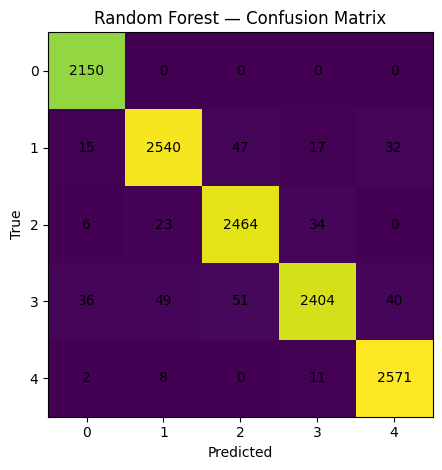

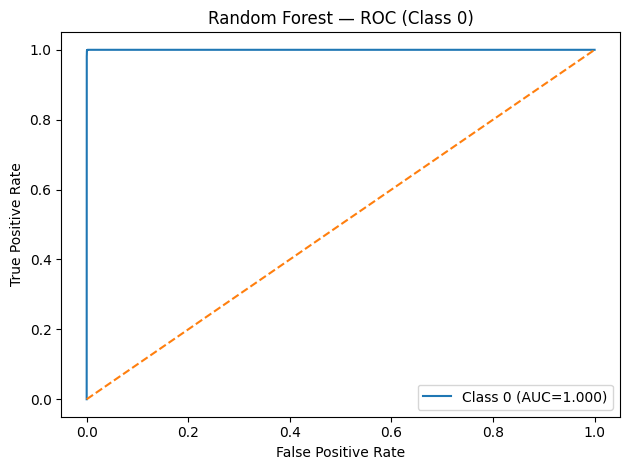

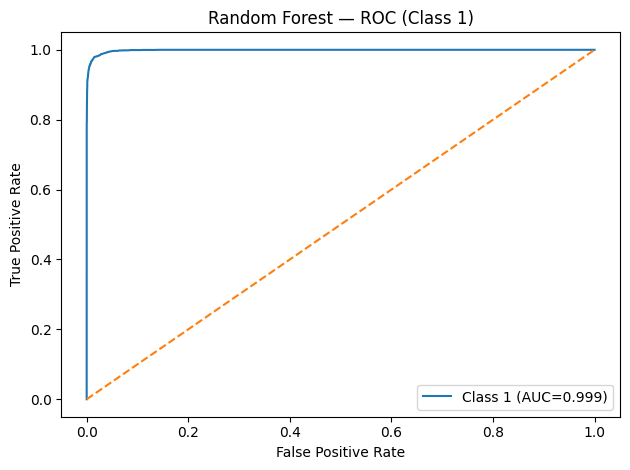

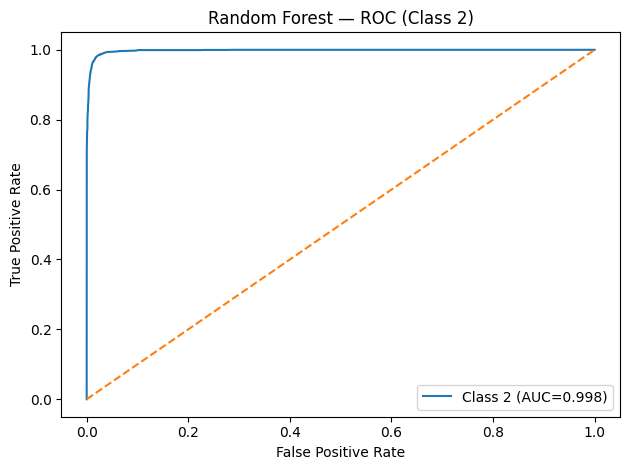

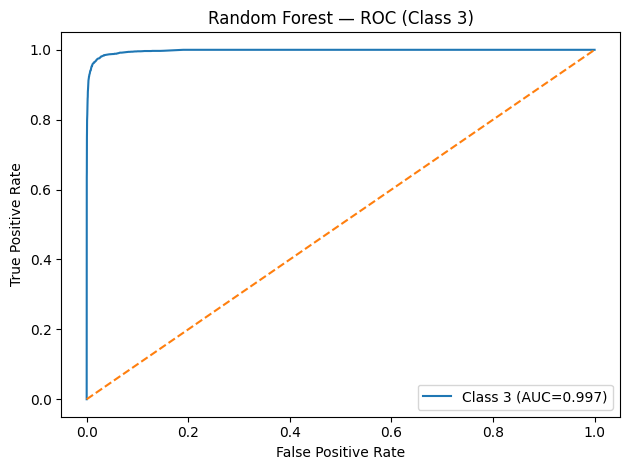

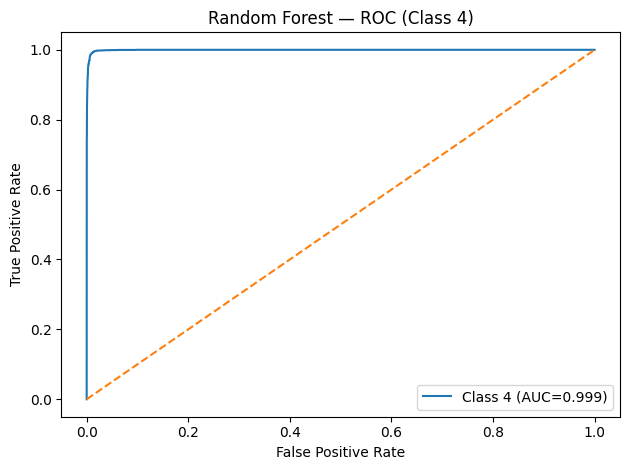

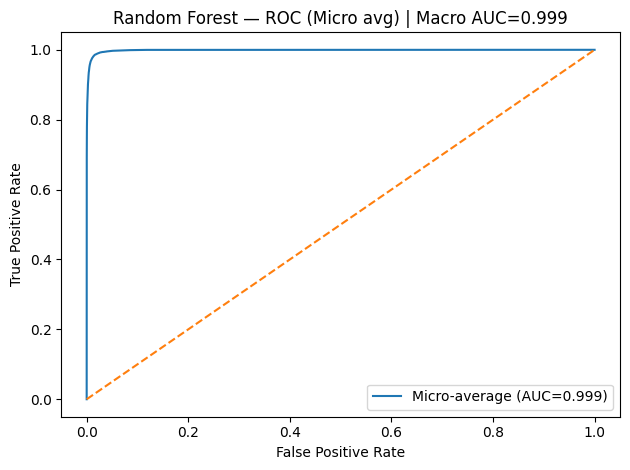

Random Forest — ROC AUCs:
  Class 0: 1.0000
  Class 1: 0.9987
  Class 2: 0.9979
  Class 3: 0.9975
  Class 4: 0.9993
  Micro-average: 0.9987
  Macro-average: 0.9987


In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight=None
)

t0 = time.perf_counter()
rf.fit(X_train, y_train)  # no scaling for trees
train_time_rf = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_rf = rf.predict(X_test)
test_time_rf = time.perf_counter() - t1

print(f"RandomForest Train time: {train_time_rf:.4f}s | Test time: {test_time_rf:.4f}s")
print_basic_metrics("Random Forest", y_test, y_pred_rf)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf, classes)

# ROC (probabilities from RF)
proba_rf = rf.predict_proba(X_test)
plot_multiclass_roc("Random Forest", y_test, proba_rf, classes)


**Support Vector Machine**

SVM (RBF) Train time: 310.2755s | Test time: 23.2762s

=== SVM (RBF) : Test Metrics ===
Accuracy: 0.6995
Macro F1: 0.6970

Classification report:
              precision    recall  f1-score   support

           0      0.559     0.814     0.663      2150
           1      0.769     0.809     0.789      2651
           2      0.786     0.561     0.655      2527
           3      0.695     0.630     0.661      2580
           4      0.740     0.697     0.718      2592

    accuracy                          0.700     12500
   macro avg      0.710     0.702     0.697     12500
weighted avg      0.715     0.700     0.699     12500



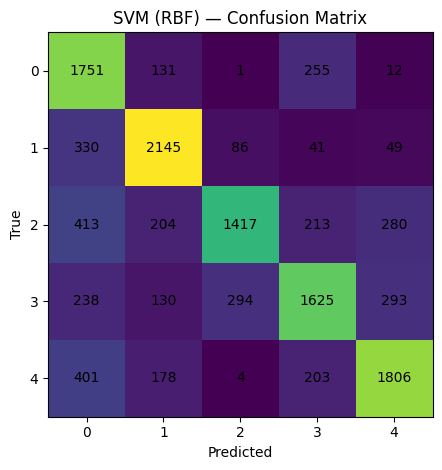

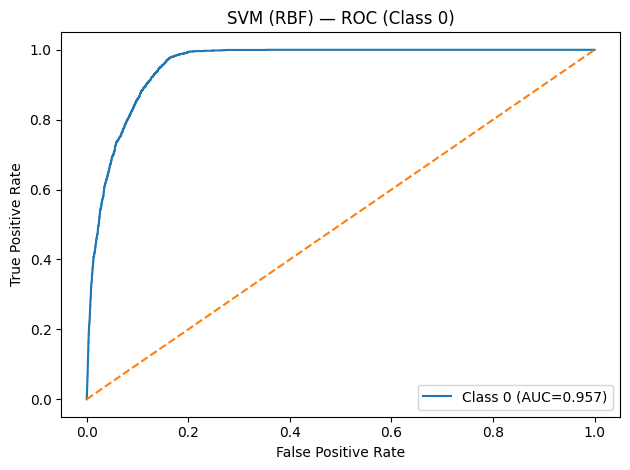

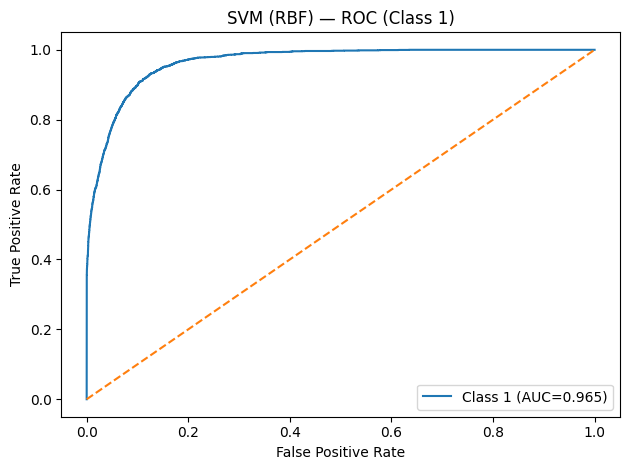

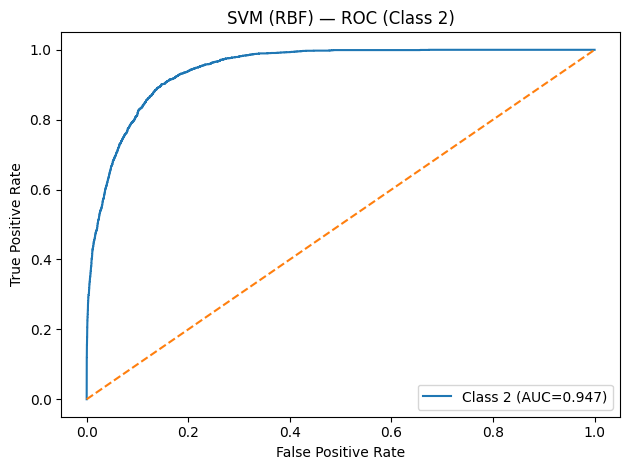

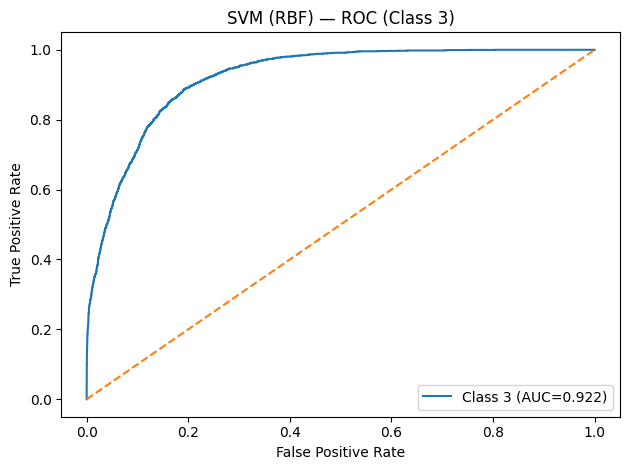

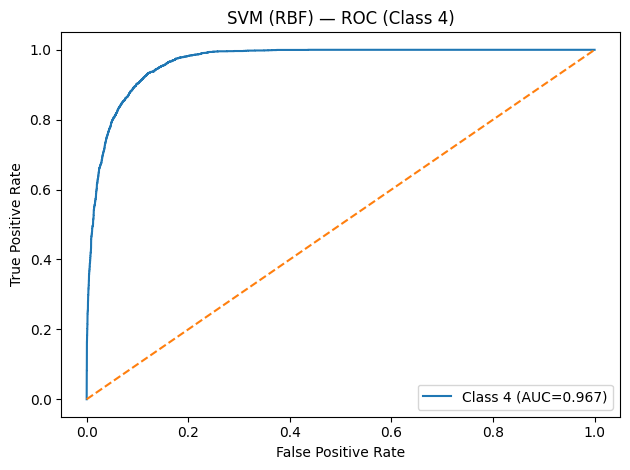

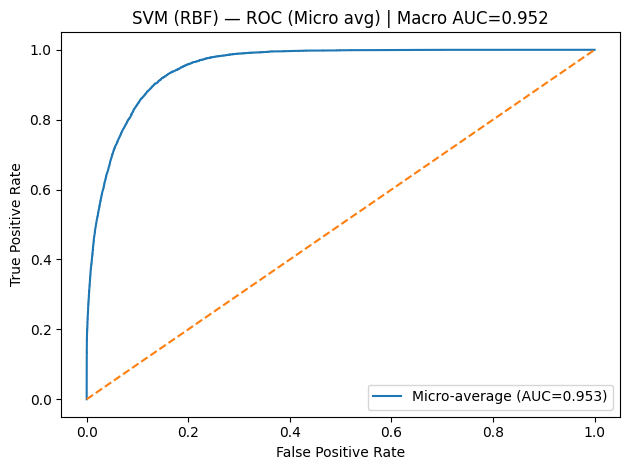

SVM (RBF) — ROC AUCs:
  Class 0: 0.9574
  Class 1: 0.9655
  Class 2: 0.9469
  Class 3: 0.9217
  Class 4: 0.9673
  Micro-average: 0.9530
  Macro-average: 0.9517


In [ ]:
svm = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,   # needed for ROC curves / predict_proba
    random_state=42
)

t0 = time.perf_counter()
svm.fit(X_train_scaled, y_train)
train_time_svm = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_svm = svm.predict(X_test_scaled)
test_time_svm = time.perf_counter() - t1

print(f"SVM (RBF) Train time: {train_time_svm:.4f}s | Test time: {test_time_svm:.4f}s")
print_basic_metrics("SVM (RBF)", y_test, y_pred_svm)
plot_confusion_matrix("SVM (RBF)", y_test, y_pred_svm, classes)

# ROC (probabilities via Platt scaling since probability=True)
proba_svm = svm.predict_proba(X_test_scaled)
plot_multiclass_roc("SVM (RBF)", y_test, proba_svm, classes)


**Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold

k = 5  # adjust for your dataset size; must be <= smallest class count
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

def kfold_report(name, model, X_full, y_full, needs_scaling=False):
    acc_scores = []
    f1m_scores = []
    train_times = []
    test_times = []

    for train_idx, val_idx in skf.split(X_full, y_full):
        X_tr, X_val = X_full[train_idx], X_full[val_idx]
        y_tr, y_val = y_full[train_idx], y_full[val_idx]

        if needs_scaling:
            scaler_k = StandardScaler()
            X_tr = scaler_k.fit_transform(X_tr)
            X_val = scaler_k.transform(X_val)

        t0 = time.perf_counter()
        model.fit(X_tr, y_tr)
        train_times.append(time.perf_counter() - t0)

        t1 = time.perf_counter()
        y_val_pred = model.predict(X_val)
        test_times.append(time.perf_counter() - t1)

        acc_scores.append(accuracy_score(y_val, y_val_pred))
        f1m_scores.append(f1_score(y_val, y_val_pred, average="macro"))

    print(f"\n=== {name} : {k}-Fold Validation ===")
    print(f"Accuracy: mean={np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"Macro F1: mean={np.mean(f1m_scores):.4f} ± {np.std(f1m_scores):.4f}")
    print(f"Train time per fold: mean={np.mean(train_times):.4f}s")
    print(f"Test  time per fold: mean={np.mean(test_times):.4f}s")

# Fresh models for CV
kfold_report("Logistic Regression",
             LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000),
             X, y, needs_scaling=True)

kfold_report("Random Forest",
             RandomForestClassifier(n_estimators=400, random_state=42),
             X, y, needs_scaling=False)

kfold_report("SVM (RBF)",
             SVC(kernel="rbf", C=1.0, gamma="scale"),
             X, y, needs_scaling=True)



=== Logistic Regression : 5-Fold Validation ===
Accuracy: mean=0.4445 ± 0.0057
Macro F1: mean=0.3934 ± 0.0057
Train time per fold: mean=0.4896s
Test  time per fold: mean=0.0047s

=== Random Forest : 5-Fold Validation ===
Accuracy: mean=0.9736 ± 0.0012
Macro F1: mean=0.9741 ± 0.0011
Train time per fold: mean=16.7662s
Test  time per fold: mean=0.8084s

=== SVM (RBF) : 5-Fold Validation ===
Accuracy: mean=0.7028 ± 0.0067
Macro F1: mean=0.7002 ± 0.0070
Train time per fold: mean=67.6428s
Test  time per fold: mean=20.4897s
